 ## Imports


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score

## Get the Data

** Read in the melbourn_housing_data csv file as a DataFrame called A.**

In [2]:
A = pd.read_csv("D:/Pradnya Data/Python Data/DataSets/cleaned_melbourn_housing_data.csv")  


**Check the head of A, and check out its info() and describe() methods.**

In [3]:
A.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
A.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20312.000000,2.031200e+04,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000
mean,3.067743,1.089994e+06,11.413283,3114.165961,1.596642,1.715242,597.812746,-37.806890,144.997336,7521.028358
std,0.944962,6.556246e+05,6.785729,114.554795,0.703154,0.992487,535.083347,0.091806,0.120199,4404.138049
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,14.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.570000e+05,6.600000,3046.000000,1.000000,1.000000,308.000000,-37.861300,144.925048,4385.000000
50%,3.000000,9.100000e+05,10.500000,3087.000000,1.000000,2.000000,567.000000,-37.799700,145.004500,6567.000000
75%,4.000000,1.333250e+06,14.200000,3152.000000,2.000000,2.000000,696.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3977.000000,9.000000,18.000000,9838.000000,-37.397800,145.526350,21650.000000


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20312 entries, 0 to 20311
Data columns (total 18 columns):
Suburb           20312 non-null object
Address          20312 non-null object
Rooms            20312 non-null int64
Type             20312 non-null object
Price            20312 non-null int64
Method           20312 non-null object
SellerG          20312 non-null object
Date             20312 non-null object
Distance         20312 non-null float64
Postcode         20312 non-null int64
Bathroom         20312 non-null int64
Car              20312 non-null int64
Landsize         20312 non-null float64
CouncilArea      20312 non-null object
Lattitude        20312 non-null float64
Longtitude       20312 non-null float64
Regionname       20312 non-null object
Propertycount    20312 non-null int64
dtypes: float64(4), int64(6), object(8)
memory usage: 2.8+ MB


## Exploratory Data Analysis

**This is also a very important step in your prediction process as it help you to get aware you about existing patterns in the data how it is relating to your target variables etc.**


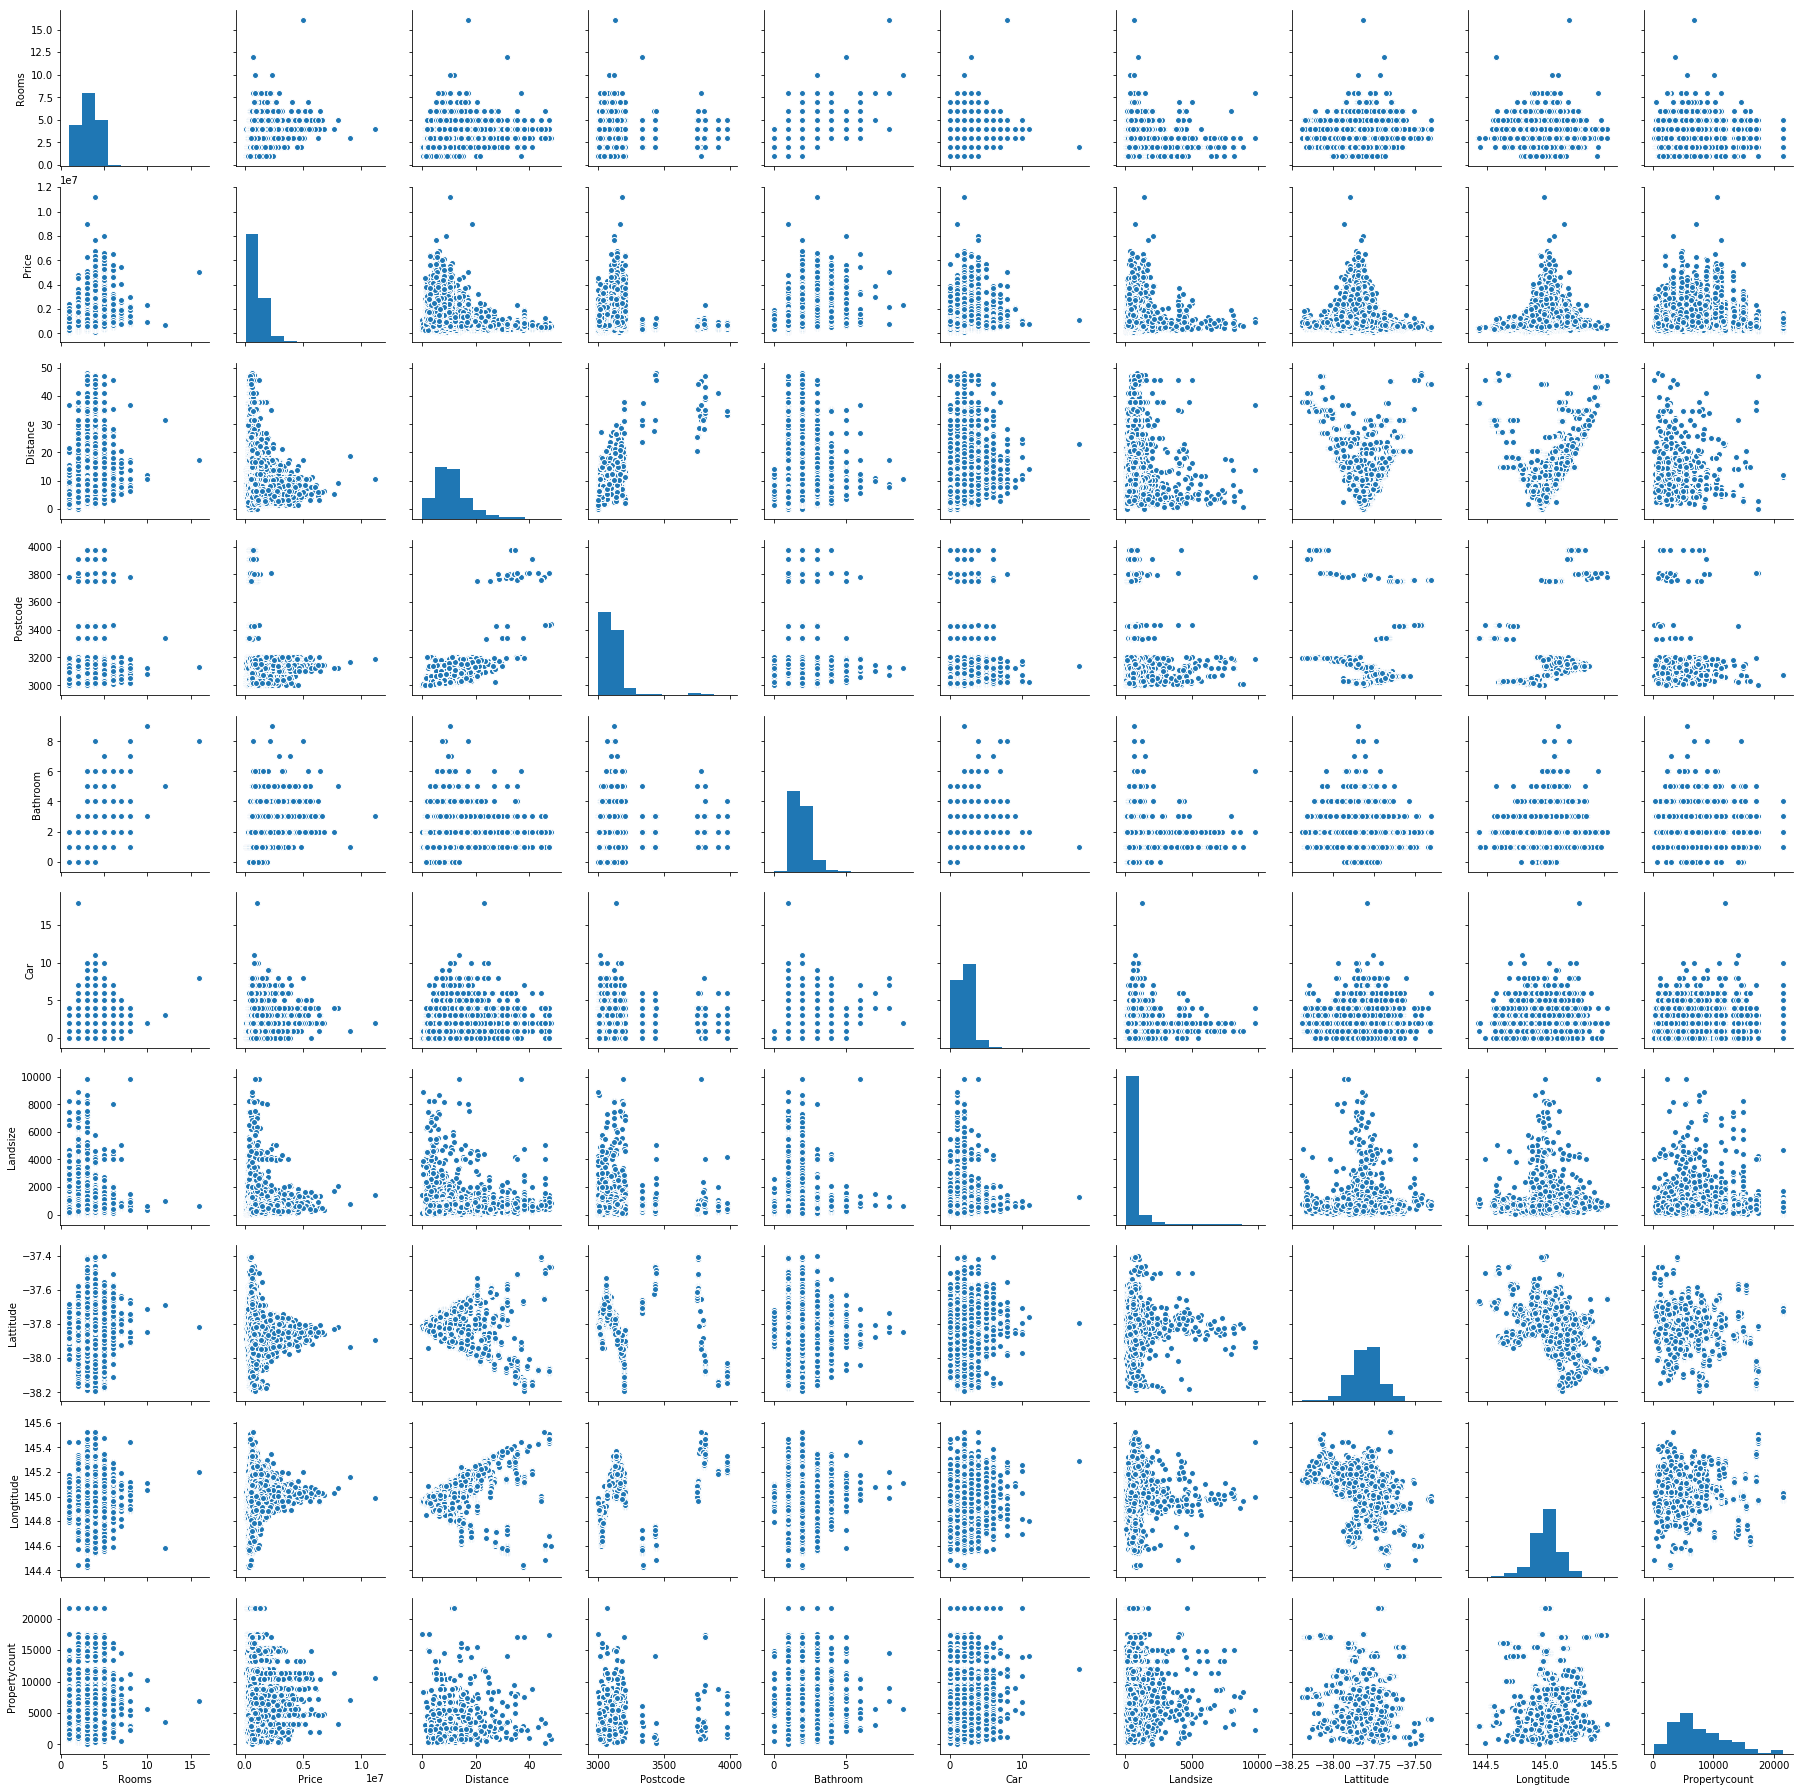

In [6]:
sb.pairplot(A)

**Pairplots to visualize strong correlation.**

In [7]:
B=A.copy()


In [8]:
B

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019
5,Abbotsford,129 Charles St,2,h,941000,S,Jellis,7/05/2016,2.5,3067,1,0,181.0,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,2,0,245.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,1,2,256.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019
8,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,8/10/2016,2.5,3067,1,1,1950.0,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
9,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,1,2,220.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019


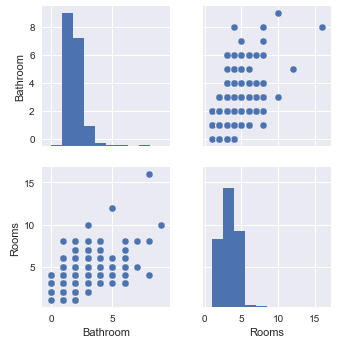

In [9]:
sb.set()
cols = ['Bathroom','Rooms']
sb.pairplot(B[cols])
plt.show();

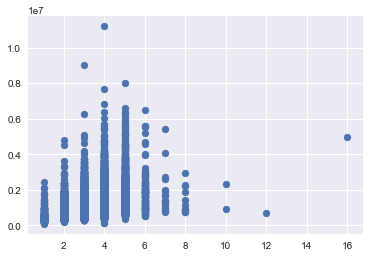

In [10]:
plt.scatter(B.Rooms, B.Price)

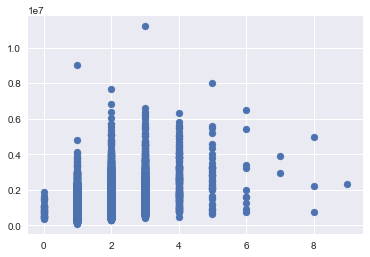

In [11]:
plt.scatter(B.Bathroom, B.Price)

## Data Cleaning And Preprocessing


In [14]:
le = LabelEncoder()

A["CouncilArea"] = le.fit_transform (A["CouncilArea"])
A["Regionname"] = le.fit_transform (A["Regionname"])
A["Type"] = le.fit_transform ( A["Type"])
A["Method"] = le.fit_transform (A["Method"])



**Finding Correlation**

In [15]:
A.corr()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.530800,0.446619,-0.023365,0.277839,0.082095,0.608342,0.394134,-0.014018,-0.114413,0.016492,0.089371,-0.040811,-0.061032
Type,-0.530800,1.000000,-0.345714,0.054563,-0.249859,-0.018541,-0.223951,-0.269356,0.179378,0.066550,-0.094494,0.004450,0.070817,0.064895
Price,0.446619,-0.345714,1.000000,-0.004991,-0.235112,0.036561,0.432303,0.201527,0.002162,-0.118458,-0.218727,0.199539,0.079640,-0.052472
Method,-0.023365,0.054563,-0.004991,1.000000,-0.041846,-0.003707,0.010972,-0.013640,0.038921,0.011253,-0.011255,-0.022967,0.019140,-0.033508
Distance,0.277839,-0.249859,-0.235112,-0.041846,1.000000,0.499007,0.135514,0.242896,0.008899,-0.110537,-0.103722,0.202942,-0.127355,0.005891
Postcode,0.082095,-0.018541,0.036561,-0.003707,0.499007,1.000000,0.121407,0.060144,0.044108,0.016535,-0.224152,0.375961,-0.056419,0.035832
Bathroom,0.608342,-0.223951,0.432303,0.010972,0.135514,0.121407,1.000000,0.304772,0.027737,-0.062048,-0.049394,0.104054,0.006028,-0.040512
Car,0.394134,-0.269356,0.201527,-0.013640,0.242896,0.060144,0.304772,1.000000,0.073518,-0.126260,-0.002738,0.042678,0.012989,-0.012373
Landsize,-0.014018,0.179378,0.002162,0.038921,0.008899,0.044108,0.027737,0.073518,1.000000,0.032142,-0.033221,0.064228,-0.049134,0.024792
CouncilArea,-0.114413,0.066550,-0.118458,0.011253,-0.110537,0.016535,-0.062048,-0.126260,0.032142,1.000000,0.104530,-0.135525,-0.073322,0.025290


** Drop the column beacuse these column are not correlate with the target variable.**

In [16]:
A.drop(['Date', 'Address', 'Suburb','Postcode','SellerG'], axis=1, inplace=True)

## Training and Testing Data

In [17]:
X = A.drop(['Price'], axis = 1)
Y = A['Price']


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=42**

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 150)

## Applying Machine Learning Model

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
start = time()

model = lm.fit(X_train,y_train)
end=time()
train_time_lm=end-start

predictions = model.predict(X_test)
exp_LM = explained_variance_score(y_test,predictions)
lmr_r2=r2_score(y_test, predictions)
lrm=lm.score(X_test,y_test)
MSE_LM = mean_squared_error(y_test,predictions)

In [63]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
start = time()

model1 = rfr.fit(X_train,y_train)
end=time()
train_time_rand=end-start

predictions1 = model1.predict(X_test)
exp_RF = explained_variance_score(y_test,predictions1)
rand_r2=r2_score(y_test,predictions1)
random=rfr.score(X_test,y_test)
MSE_RF = mean_squared_error(y_test,predictions1)

In [64]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
start = time()

model2 = dt.fit(X_train,y_train)
end=time()
train_time_dec=end-start

predictions2 = model2.predict(X_test)
exp_DT = explained_variance_score(y_test,predictions2)
dt_r2=r2_score(y_test,predictions2)
decc=dt.score(X_test,y_test)
MSE_DT = mean_squared_error(y_test,predictions2)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
start = time()

model3 = gbr.fit(X_train, y_train)
end=time()
train_time_g=end-start

predictions3 = model3.predict(X_test)
exp_GBR = explained_variance_score(y_test,predictions3)
gbr_r2=r2_score(y_test,predictions3)
gradient=gbr.score(X_test,y_test)
MSE_GBR = mean_squared_error(y_test,predictions3)


** Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models**.


In [68]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest','Decision Tree','Linear Regression'],
    'Score': [gradient,random,decc,lrm],
    'Variance Score': [exp_GBR,exp_RF,exp_DT,exp_LM],
    'R2 Score' : [gbr_r2,rand_r2,dt_r2,lmr_r2],
    'Mean Squared Error': [MSE_GBR,MSE_RF,MSE_DT,MSE_LM]})
    
models_cross.sort_values(by='Score', ascending=False)

,Mean Squared Error,Model,R2 Score,Score,Variance Score
1,7.925874e+10,Random Forest,0.802630,0.802630,0.802787
0,9.104189e+10,Gradient Boosting,0.773287,0.773287,0.773326
2,1.291342e+11,Decision Tree,0.678430,0.678430,0.678669
3,1.831443e+11,Linear Regression,0.543934,0.543934,0.544096


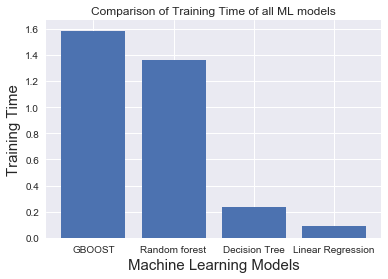

In [69]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
model = ['GBOOST', 'Random forest', 'Decision Tree','Linear Regression']
Train_Time = [
    
    train_time_g,
    train_time_rand,
    train_time_dec,
    train_time_lm
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()